<a href="https://colab.research.google.com/github/Ahouahounko/Chat-with-your-Data-/blob/main/ChatWithData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langchain
!pip install openai
!pip install pypdf
# !pip install dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.0/798.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.9/224.9 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the 

#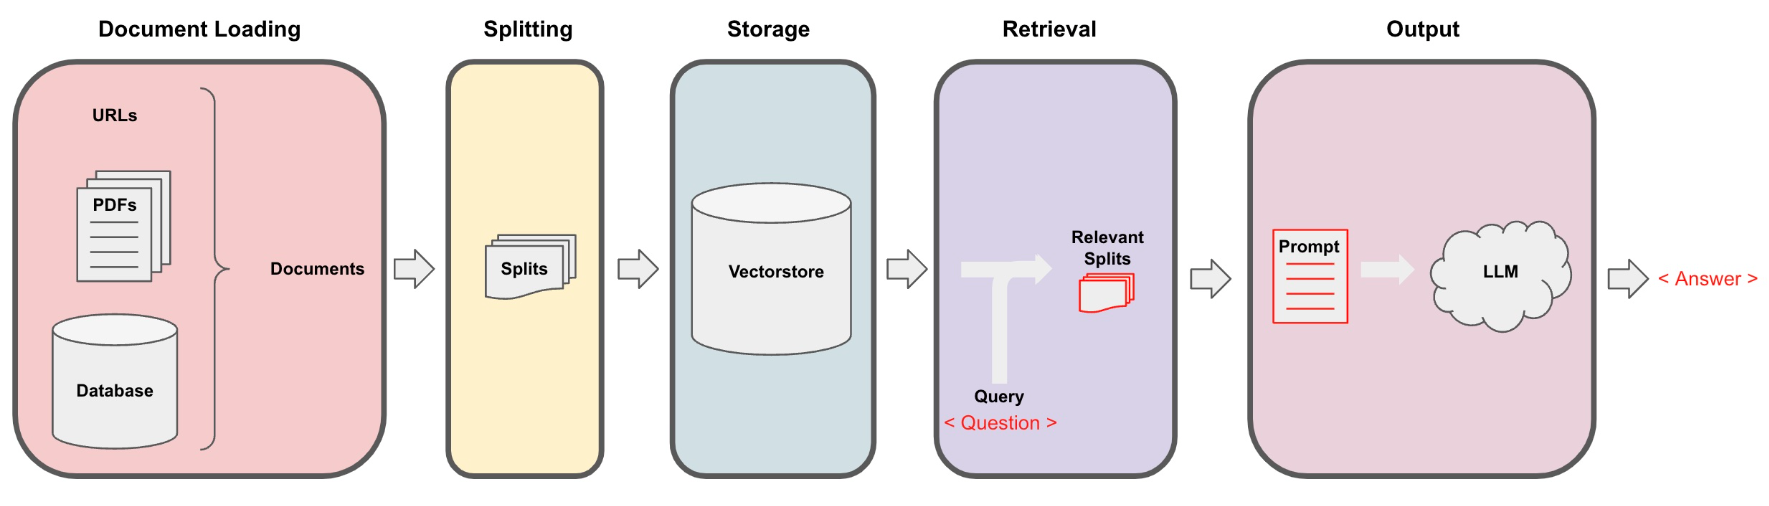 Retrieval augmented generation(RAG)


**RAG** is a technique for augmenting LLM knowledge with additional, often private or real-time, data.

In retrieval augmented generation (RAG), an LLM retrieves contextual documents from an external dataset as part of its execution.

This is useful if we want to ask question about specific documents (e.g., our PDFs, a set of videos, etc).



* [Some PDF loaders](https://integrations.langchain.com/):
   **PyPDFLoader**, UnstructuredPDFLoader,...
* [Some YouTube loaders](https://python.langchain.com/docs/integrations/document_loaders/youtube_transcript): **YoutubeLoader**, YoutubeAudioLoader, GoogleApiYoutubeLoader,...
* [Some URLs loaders](https://integrations.langchain.com/): **WebBaseLoader**, UnstructuredHTMLLoader, UnstructuredURLLoader ...





In [ ]:
# !pip install langchain
# !pip install openai
# !pip install pypdf

In [ ]:
import os
import openai
import sys
sys.path.append('../..')

# Install the dotenv module if you haven't done so already
!pip install python-dotenv

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file


In [ ]:
openai.api_key  = os.environ['OPENAI_API_KEY']

## PDFs

In [ ]:
!curl -o paper.pdf https://arxiv.org/pdf/2303.13519.pdf

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6745k  100 6745k    0     0  8584k      0 --:--:-- --:--:-- --:--:-- 8581k


In [ ]:
from langchain.document_loaders import PyPDFLoader


pdf_path = "./paper.pdf"
loader = PyPDFLoader(pdf_path)
pages = loader.load()

Each page is a `Document`.

A `Document` contains text (`page_content`) and `metadata`.

In [ ]:
len(pages)

14

In [ ]:
page = pages[0]

In [ ]:
page.page_content

'Learning and Veriﬁcation of Task Structure in Instructional Videos\nMedhini Narasimhan1,2, Licheng Yu2, Sean Bell2, Ning Zhang2, Trevor Darrell1\n1UC Berkeley,2Meta AI\nhttps://medhini.github.io/task_structure\nAbstract\nGiven the enormous number of instructional videos\navailable online, learning a diverse array of multi-step task\nmodels from videos is an appealing goal. We introduce\na new pre-trained video model, VideoTaskformer, focused\non representing the semantics and structure of instructional\nvideos. We pre-train VideoTaskformer using a simple and\neffective objective: predicting weakly supervised textual la-\nbels for steps that are randomly masked out from an instruc-\ntional video (masked step modeling). Compared to prior\nwork which learns step representations locally, our ap-\nproach involves learning them globally, leveraging video of\nthe entire surrounding task as context. From these learned\nrepresentations, we can verify if an unseen video correctly\nexecutes a gi

In [ ]:
page.metadata

{'source': './paper.pdf', 'page': 0}

## YouTube

In [ ]:
from langchain.document_loaders import YoutubeLoader

In [ ]:
# !pip install youtube-transcript-api
# !pip install pytube

In [ ]:
loader = YoutubeLoader.from_youtube_url(
    "https://www.youtube.com/watch?v=jGwO_UgTS7I",
    add_video_info=True,
    translation = "fr"

)

In [ ]:
docn = loader.load()

In [ ]:
docn[0].page_content[:500]

"Bienvenue dans CS229 Machine Learning. Euh, certains d'entre vous savent que ce cours est enseigné à Stanford depuis longtemps. Et c'est souvent le cours que j'ai le plus hâte d'enseigner chaque année parce que c'est là que nous avons aidé, je pense, plusieurs générations d'étudiants de Stanford à devenir des experts en apprentissage automatique, puis à créer nombre de leurs produits et services.  et des startups que, je suis sûr, beaucoup d'entre vous utilisent déjà, ou que vous utilisez tous, "

## URLs

In [ ]:
from langchain.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://github.com/basecamp/handbook/blob/master/37signals-is-you.md")

In [ ]:
docs = loader.load()

In [ ]:
print(docs[0].page_content[:500])

# Document Splitting


Document splitting
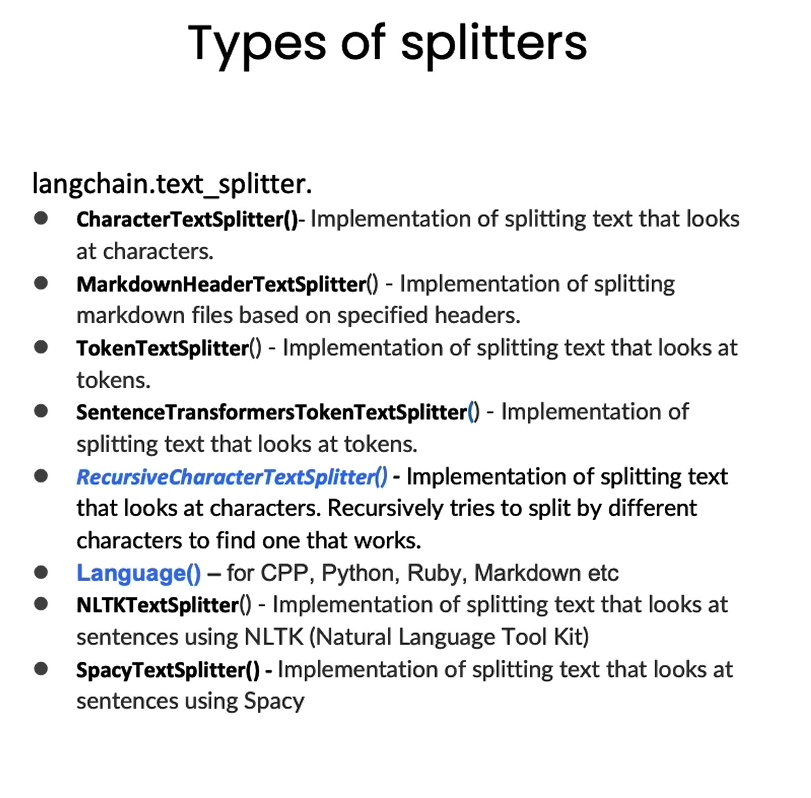

In [ ]:
import os
import openai
import sys
sys.path.append('../..')

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.environ['OPENAI_API_KEY']

## Recursive splitting, Character Text splitting

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter

In [ ]:
chunk_size =26
chunk_overlap = 4

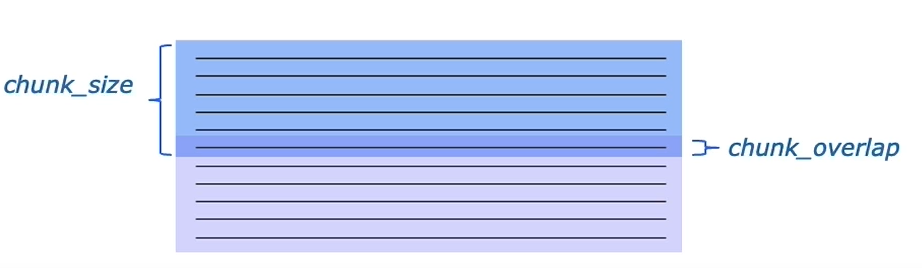

In [ ]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)
c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)

In [ ]:
text1 = 'abcdefghijklmnopqrstuvwxyz'
text2 = 'abcdefghijklmnopqrstuvwxyzabcdefg'
text3 = "a b c d e f g h i j k l m n o p q r s t u v w x y z"

## Text1

In [ ]:
r_splitter.split_text(text1)

['abcdefghijklmnopqrstuvwxyz']

In [ ]:
c_splitter.split_text(text1)

['abcdefghijklmnopqrstuvwxyz']

## Text2

In [ ]:
r_splitter.split_text(text2)

['abcdefghijklmnopqrstuvwxyz', 'wxyzabcdefg']

In [ ]:
c_splitter.split_text(text2)

['abcdefghijklmnopqrstuvwxyzabcdefg']

## Text3

In [ ]:
r_splitter.split_text(text3)

['a b c d e f g h i j k l m', 'l m n o p q r s t u v w x', 'w x y z']

In [ ]:
c_splitter.split_text(text3)

['a b c d e f g h i j k l m n o p q r s t u v w x y z']

In [ ]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap,
    separators = ["\n\n", "\n", " ", ""]
)



In [ ]:
c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap,
    separator = ' '
)

In [ ]:
some_text = """When writing documents, writers will use document structure to group content. \
This can convey to the reader, which idea's are related. For example, closely related ideas \
are in sentances. Similar ideas are in paragraphs. Paragraphs form a document. \n\n  \
Paragraphs are often delimited with a carriage return or two carriage returns. \
Carriage returns are the "backslash n" you see embedded in this string. \
Sentences have a period at the end, but also, have a space.\
and words are separated by space."""

In [ ]:
len(some_text)

496

In [ ]:
r_splitter.split_text(some_text)

['When writing documents,',
 'writers will use document',
 'structure to group',
 'content. This can convey',
 'to the reader, which',
 "idea's are related. For",
 'For example, closely',
 'related ideas are in',
 'in sentances. Similar',
 'ideas are in paragraphs.',
 'Paragraphs form a',
 'a document.',
 'Paragraphs are often',
 'delimited with a carriage',
 'return or two carriage',
 'returns. Carriage returns',
 'are the "backslash n" you',
 'you see embedded in this',
 'string. Sentences have a',
 'a period at the end, but',
 'but also, have a',
 'a space.and words are',
 'are separated by space.']

In [ ]:
c_splitter.split_text(some_text)

['When writing documents,',
 'writers will use document',
 'structure to group',
 'content. This can convey',
 'to the reader, which',
 "idea's are related. For",
 'For example, closely',
 'related ideas are in',
 'in sentances. Similar',
 'ideas are in paragraphs.',
 'Paragraphs form a',
 'a document. \n\n Paragraphs',
 'are often delimited with a',
 'a carriage return or two',
 'two carriage returns.',
 'Carriage returns are the',
 'the "backslash n" you see',
 'see embedded in this',
 'this string. Sentences',
 'have a period at the end,',
 'end, but also, have a',
 'a space.and words are',
 'are separated by space.']

In [ ]:
# c_splitter = CharacterTextSplitter(
#     chunk_size=450,
#     chunk_overlap=0,
#     separator = ' '
# )
# r_splitter = RecursiveCharacterTextSplitter(
#     chunk_size=450,
#     chunk_overlap=0,
#     separators=["\n\n", "\n", " ", ""]
# )

In [ ]:
!curl -o paper.pdf https://arxiv.org/pdf/2303.13519.pdf

In [ ]:
from langchain.document_loaders import PyPDFLoader


pdf_path = "./paper.pdf"
loader = PyPDFLoader(pdf_path)
pages = loader.load()

In [ ]:
text_splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=1000,
    chunk_overlap=150,
    length_function=len
)

In [ ]:
docs = text_splitter.split_documents(pages)

In [ ]:
len(docs)

In [ ]:
len(pages)

## Token splitting

We can also split on token count explicity, if we want.

This can be useful because LLMs often have context windows designated in tokens.

Tokens are often ~4 characters.

In [ ]:
from langchain.text_splitter import TokenTextSplitter

In [ ]:
#!pip install tiktoken

In [ ]:
text_splitter = TokenTextSplitter(chunk_size=1, chunk_overlap=0)

In [ ]:
text1 = "foo bar bazzyfoo"

In [ ]:
text_splitter.split_text(text1)

['foo', ' bar', ' b', 'az', 'zy', 'foo']

# Vectorstores and Embeddings


In [ ]:
import os
import openai
import sys
sys.path.append('../..')

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.environ['OPENAI_API_KEY']

## Embeddings

In [ ]:
from langchain.embeddings.openai import OpenAIEmbeddings

embedding = OpenAIEmbeddings()

In [ ]:
#!pip install tiktoken

In [ ]:
sentence1 = "C'est un chien"
sentence2 = "C'est une canine"
sentence3 = "J'aime Paris"

In [ ]:
embedding1 = embedding.embed_query(sentence1)
embedding2 = embedding.embed_query(sentence2)
embedding3 = embedding.embed_query(sentence3)

In [ ]:
import numpy as np

In [ ]:
np.dot(embedding1, embedding2)

0.9565752833110895

In [ ]:
np.dot(embedding1, embedding3)

0.794422103221121

In [ ]:
np.dot(embedding2, embedding3)

## Vectorstores

In [ ]:
!curl -o paper.pdf https://arxiv.org/pdf/2303.13519.pdf

from langchain.document_loaders import PyPDFLoader


pdf_path = "./paper.pdf"
loader = PyPDFLoader(pdf_path)
pages = loader.load()

text_splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=1000,
    chunk_overlap=150,
    length_function=len
)

docs = text_splitter.split_documents(pages)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6745k  100 6745k    0     0  2322k      0  0:00:02  0:00:02 --:--:-- 2322k


In [ ]:
#! pip install chromadb

In [ ]:
!rm -rf ./docb

In [ ]:
from langchain.vectorstores import Chroma

In [ ]:
vectordb = Chroma.from_documents(
    documents= docs,
    embedding=embedding,
    persist_directory="./docb"
)

vectordb.persist()

In [ ]:
len(docs)

71

In [ ]:
print(vectordb._collection.count())

71


### Similarity Search

In [ ]:
question = "Highlight downstream tasks"

In [ ]:
docs = vectordb.similarity_search(question,k=3)

In [ ]:
docs[1].page_content

'forecasting tasks, we tried replacing video features with\nASR text during ﬁne-tuning. The base model is a language\nmodel for embedding sentences in the ASR text and is kept\nﬁxed. The ASR text embeddings for all the segments of\nthe video are fed as input to the downstream model, a basic\nsingle-layer transformer, which is ﬁne-tuned to each of the\ntasks.\n•Task label. For mistake detection and long-term forecast-\ning tasks, we include the task name, e.g. “Install a Ceiling\nFan” , as input to the downstream model. We compute the\nsentence embedding of the task label and append it to the\nlist of video tokens fed as input to the model. This do-\nmain knowledge provides additional context which boosts\nthe performance on these challenging downstream tasks.\n•Linear-probe vs Fine-tuning. In linear-probe evaluation,\nonly thefheadlayer is ﬁne-tuned to each downstream task\nand in the ﬁne-tuning setting, all the layers of the segment\ntransformer ftransare ﬁne-tuned.\n5.3. Results'

In [ ]:
 docs[0].metadata

{'page': 2, 'source': './paper.pdf'}

# Retrieval

Retrieval is the centerpiece of our retrieval augmented generation (RAG) flow.

- [Retrievers](https://python.langchain.com/en/latest/modules/indexes/retrievers.html)
  - [search_type](https://python.langchain.com/en/latest/modules/indexes/vectorstores/examples/chroma.html#mmr): "similarity" or "mmr"


## Vectorstore retrieval



In [ ]:
import os
import openai
import sys
sys.path.append('../..')

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.environ['OPENAI_API_KEY']

In [ ]:
#!pip install lark

### Similarity Search

In [ ]:
from langchain.vectorstores import Chroma
from langchain.embeddings.openai import OpenAIEmbeddings


In [ ]:
persist_directory = 'docs/chr/'
embedding = OpenAIEmbeddings()


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.embeddings.openai.OpenAIEmbeddings` was deprecated in langchain-community 0.1.0 and will be removed in 0.2.0. Use langchain_openai.OpenAIEmbeddings instead.
  warn_deprecated(


In [ ]:
texts = [
    """L'Amanita phalloides possède une grande et imposante fructification (basidiocarpe) épigée (au-dessus du sol)""",
    """L'Amanita phalloides est un champignon à grande fructification. Certaines variétés sont entièrement blanches.""",
    """L'Amanita phalloides, alias Death Cap, est l'un des champignons les plus vénéneux que l'on connaisse.""",
]

In [ ]:
textsdb = Chroma.from_texts(texts, embedding=embedding)

In [ ]:
print(textsdb._collection.count())

3


In [ ]:
question = "Parlez-moi des champignons entièrement blancs avec de grandes fructifications."

In [ ]:
textsdb.similarity_search(question, k=2)

[Document(page_content="L'Amanita phalloides est un champignon à grande fructification. Certaines variétés sont entièrement blanches."),
 Document(page_content="L'Amanita phalloides possède une grande et imposante fructification (basidiocarpe) épigée (au-dessus du sol)")]

### Addressing Diversity: Maximum marginal relevance

how to enforce diversity in the search results?

`Maximum marginal relevance` strives to achieve both relevance to the query *and diversity* among the results.

In [ ]:
textsdb.max_marginal_relevance_search(question,k=2, fetch_k=3)

[Document(page_content="L'Amanita phalloides est un champignon à grande fructification. Certaines variétés sont entièrement blanches."),
 Document(page_content="L'Amanita phalloides, alias Death Cap, est l'un des champignons les plus vénéneux que l'on connaisse.")]

### Compression

Another approach for improving the quality of retrieved docs is compression.

Information most relevant to a query may be buried in a document with a lot of irrelevant text.

Passing that full document through your application can lead to more expensive LLM calls and poorer responses.

Contextual compression is meant to fix this.

In [ ]:
!curl -o paper.pdf https://arxiv.org/pdf/2303.13519.pdf

from langchain.document_loaders import PyPDFLoader


pdf_path = "./paper.pdf"
loader = PyPDFLoader(pdf_path)
pages = loader.load()

text_splitter = RecursiveCharacterTextSplitter(
    separators="\n",
    chunk_size=1000,
    chunk_overlap=150,
    length_function=len
)

docs = text_splitter.split_documents(pages)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6745k  100 6745k    0     0  2689k      0  0:00:02  0:00:02 --:--:-- 2688k


In [ ]:
from langchain.vectorstores import Chroma

vectordb = Chroma.from_documents(
    documents= docs,
    embedding=embedding,
    persist_directory= persist_directory
)

vectordb.persist()

In [ ]:
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor
from langchain.llms import OpenAI

In [ ]:
def pretty_print_docs(docs):
    print(f"\n{'-' * 100}\n".join([f"Document {i+1}:\n\n" + d.page_content for i, d in enumerate(docs)]))


In [ ]:

llm = OpenAI(temperature=0)
compressor = LLMChainExtractor.from_llm(llm)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.llms.openai.OpenAI` was deprecated in langchain-community 0.1.0 and will be removed in 0.2.0. Use langchain_openai.OpenAI instead.
  warn_deprecated(


In [ ]:
compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor,
    base_retriever=vectordb.as_retriever()
)

In [ ]:
question = "Highlight downstream tasks"
compressed_docs = compression_retriever.get_relevant_documents(question)
pretty_print_docs(compressed_docs)


/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:316: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:316: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:316: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:316: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(


Document 1:

We train a video model Video-TaskformerfVTto learn step representations. We mask out a few clips in the input Vand feed it to fVTwhich learns to predict step labels for the masked-out clips. We evalu-ate the embeddings learned by our pre-training objective on 6 downstream tasks: step classiﬁcation, procedural activity recognition, step forecasting, mistake step detection, mistake ordering detection, and long term forecasting. Below, we provide more details on how we pre-train VideoTaskformer using a masked step modeling loss, followed by ﬁne-tuning details on the downstream tasks. 3.1. Pre-training VideoTaskformer with Masked Step Modeling.
----------------------------------------------------------------------------------------------------
Document 2:

- We compare our approach to several baselines on all downstream tasks.
- For all the downstream tasks, the downstream segment transformer is fine-tuned, except for linear-probe where we keep our pretrained model fixed and o

In [ ]:
compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor,
    base_retriever=vectordb.as_retriever(search_type = "mmr")
)
# combining various techniques

In [ ]:
question = "Highlight downstream tasks"
compressed_docs = compression_retriever.get_relevant_documents(question)
pretty_print_docs(compressed_docs)

/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:316: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:316: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:316: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:316: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(


Document 1:

We train a video model Video-TaskformerfVTto learn step representations. We mask out a few clips in the input Vand feed it to fVTwhich learns to predict step labels for the masked-out clips. We evalu-ate the embeddings learned by our pre-training objective on 6 downstream tasks: step classiﬁcation, procedural activity recognition, step forecasting, mistake step detection, mistake ordering detection, and long term forecasting. Below, we provide more details on how we pre-train VideoTaskformer using a masked step modeling loss, followed by ﬁne-tuning details on the downstream tasks. 3.1. Pre-training VideoTaskformer with Masked Step Modeling.
----------------------------------------------------------------------------------------------------
Document 2:

- We compare our approach to several baselines on all downstream tasks.
- For all the downstream tasks, the downstream segment transformer is fine-tuned, except for linear-probe where we keep our pretrained model fixed and o

## Other types of retrieval

It's worth noting that vectordb as not the only kind of tool to retrieve documents.

The `LangChain` retriever abstraction includes other ways to retrieve documents, such as TF-IDF or SVM.

In [ ]:
from langchain.retrievers import SVMRetriever
from langchain.retrievers import TFIDFRetriever
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [ ]:
!curl -o paper.pdf https://arxiv.org/pdf/2303.13519.pdf


pdf_path = "./paper.pdf"
loader = PyPDFLoader(pdf_path)
pages = loader.load()

text_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", " ", ""],
    chunk_size=1000,
    chunk_overlap=150,
    length_function=len
)

docs = text_splitter.split_documents(pages)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6745k  100 6745k    0     0  2563k      0  0:00:02  0:00:02 --:--:-- 2562k


In [ ]:
embedding = OpenAIEmbeddings()

In [ ]:
# Retrieve
svm_retriever = SVMRetriever.from_documents(docs, embedding)
tfidf_retriever = TFIDFRetriever.from_documents(docs)

In [ ]:
question = "Highlight downstream tasks"
docs_svm=svm_retriever.get_relevant_documents(question)
docs_svm[0]

Document(page_content='Take off front of stickerTaskProcedural Activity Recognition\nPaste car sticker\nTask label: Open lock with paper clips\nTask label: Replace laptop screen1. Unscrew the screws used to fix the screen2. Pull out screen connector,3. Remove the screen,4. Install new screen,5. Reset and screw on screw 2. Unscrew the screws,3. Reset and screw on screw 2. Pull out screen connector,3. Remove the screen,4. Install new screen,5. Reset and screw on screw 1. Insert paper clip into lockShort-TermStep ForecastingLong-Term Step Forecasting\nPut on sticker\nPress sticker\nTear off other side of sticker\n2.Twist paper clip by hand3. Insert paper clip into lock3. Insert paper clip into lock3. Install the new doorknob\nFigure F4: Qualitative results for procedural activity recognition, short term step forecasting, and long term step forecasting . Step\nand task labels shown along with the input are for visualization purpose only. Correct answers are shown in green and incorrect ans

In [ ]:
question = "Highlight downstream tasks"
docs_tfidf=tfidf_retriever.get_relevant_documents(question)
docs_tfidf[0]

Document(page_content='model for embedding sentences in the ASR text and is kept\nﬁxed. The ASR text embeddings for all the segments of\nthe video are fed as input to the downstream model, a basic\nsingle-layer transformer, which is ﬁne-tuned to each of the\ntasks.\n•Task label. For mistake detection and long-term forecast-\ning tasks, we include the task name, e.g. “Install a Ceiling\nFan” , as input to the downstream model. We compute the\nsentence embedding of the task label and append it to the\nlist of video tokens fed as input to the model. This do-\nmain knowledge provides additional context which boosts\nthe performance on these challenging downstream tasks.\n•Linear-probe vs Fine-tuning. In linear-probe evaluation,\nonly thefheadlayer is ﬁne-tuned to each downstream task\nand in the ﬁne-tuning setting, all the layers of the segment\ntransformer ftransare ﬁne-tuned.\n5.3. Results\nQuantitative Results. We compare our approach to sev-\neral baselines on all downstream tasks. For

### Addressing Specificity: working with metadata using self-query retriever

But we have an interesting challenge: we often want to infer the metadata from the query itself.

To address this, we can use `SelfQueryRetriever`, which uses an LLM to extract:

1. The `query` string to use for vector search
2. A metadata filter to pass in as well

Most vector databases support metadata filters, so this doesn't require any new databases or indexes.

In [ ]:
from langchain.llms import OpenAI
from langchain.retrievers.self_query.base import SelfQueryRetriever
from langchain.chains.query_constructor.base import AttributeInfo

In [ ]:
metadata_field_info = [
    AttributeInfo(
        name="source",
        description="The lecture the chunk is from, should be one of `docs/cs229_lectures/MachineLearning-Lecture01.pdf`, `docs/cs229_lectures/MachineLearning-Lecture02.pdf`, or `docs/cs229_lectures/MachineLearning-Lecture03.pdf`",
        type="string",
    ),
    AttributeInfo(
        name="page",
        description="The page from the lecture",
        type="integer",
    ),
]

**Note:** The default model for `OpenAI` ("from langchain.llms import OpenAI") is `text-davinci-003`. Due to the deprication of OpenAI's model `text-davinci-003` on 4 January 2024, you'll be using OpenAI's recommended replacement model `gpt-3.5-turbo-instruct` instead.\

In [ ]:
document_content_description = "Lecture notes"
llm = OpenAI(model='gpt-3.5-turbo-instruct', temperature=0)
retriever = SelfQueryRetriever.from_llm(
    llm,
    vectordb,
    document_content_description,
    metadata_field_info,
    verbose=True
)

In [ ]:
question = "what did they say about regression in the third lecture?"

In [ ]:
docs = retriever.get_relevant_documents(question)

In [ ]:
for d in docs:
    print(d.metadata)

# Question Answering

In [6]:
import os
import openai
import sys
sys.path.append('../..')

# Install the dotenv module if you haven't done so already
!pip install python-dotenv

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file


In [7]:
!curl -o paper.pdf https://arxiv.org/pdf/2303.13519.pdf

from langchain.document_loaders import PyPDFLoader
from langchain.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings.openai import OpenAIEmbeddings


pdf_path = "./paper.pdf"
loader = PyPDFLoader(pdf_path)
pages = loader.load()

text_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", " ", ""],
    chunk_size=1000,
    chunk_overlap=150,
    length_function=len
)

docs = text_splitter.split_documents(pages)


vectordb = Chroma.from_documents(
    documents= docs,
    embedding= OpenAIEmbeddings(),
    persist_directory="./docb"
)

vectordb.persist()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6745k  100 6745k    0     0  2314k      0  0:00:02  0:00:02 --:--:-- 2314k


In [10]:
question = "What is videotaskformer?"
docs = vectordb.similarity_search(question,k=3)
len(docs)

3

In [11]:
docs


[Document(page_content='6. Conclusion\nIn this work, we introduce a new video model, Video-\nTaskformer, for learning contextualized step representations\nthrough masked modeling of steps in instructional videos.\nWe also introduce 3 new benchmarks: mistake step detec-\ntion, mistake order detection, and long term forecasting. We\ndemonstrate that VideoTaskformer improves performance\non 6 downstream tasks, with particularly strong improve-\n8', metadata={'page': 7, 'source': './paper.pdf'}),
 Document(page_content='6. Conclusion\nIn this work, we introduce a new video model, Video-\nTaskformer, for learning contextualized step representations\nthrough masked modeling of steps in instructional videos.\nWe also introduce 3 new benchmarks: mistake step detec-\ntion, mistake order detection, and long term forecasting. We\ndemonstrate that VideoTaskformer improves performance\non 6 downstream tasks, with particularly strong improve-\n8', metadata={'page': 7, 'source': './paper.pdf'}),
 Doc

* [Chat Models](https://integrations.langchain.com/)

* [LLMs](https://integrations.langchain.com/llms)






In [12]:
from langchain.chat_models import ChatOpenAI
llm = ChatOpenAI(model_name= "gpt-3.5-turbo" , temperature=0)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


## RetrievalQA chain

In [13]:
from langchain.chains import RetrievalQA

In [14]:
qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=vectordb.as_retriever(),
    return_source_documents=True
)

In [15]:
result = qa_chain({"query": question})

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


In [16]:
result["result"]

'VideoTaskformer is a new video model introduced in the work. It is designed for learning contextualized step representations through masked modeling of steps in instructional videos. It improves performance on 6 downstream tasks and is fine-tuned using labeled data from these tasks.'

In [17]:
result["source_documents"][0]

Document(page_content='6. Conclusion\nIn this work, we introduce a new video model, Video-\nTaskformer, for learning contextualized step representations\nthrough masked modeling of steps in instructional videos.\nWe also introduce 3 new benchmarks: mistake step detec-\ntion, mistake order detection, and long term forecasting. We\ndemonstrate that VideoTaskformer improves performance\non 6 downstream tasks, with particularly strong improve-\n8', metadata={'page': 7, 'source': './paper.pdf'})

### RetrievalQA chain types

- [Chain Type](https://python.langchain.com/en/latest/modules/chains/index_examples/question_answering.html): "stuff", "map reduce", "refine", "map_rerank"


In [18]:
qa_chain_mr = RetrievalQA.from_chain_type(
    llm,
    retriever=vectordb.as_retriever(search_type = "mmr"),
    chain_type="stuff"
)
result = qa_chain_mr({"query": question})
result["result"]

'VideoTaskformer is a new video model introduced in a research work. It is designed for learning contextualized step representations in instructional videos. The model uses masked modeling of steps in the videos to learn representations that are aware of task semantics and structure. VideoTaskformer improves performance on various downstream tasks and is fine-tuned using labeled data from these tasks. It consists of a video encoder, a step transformer, and a linear layer for prediction.'

In [19]:
qa_chain_mr = RetrievalQA.from_chain_type(
    llm,
    retriever=vectordb.as_retriever(search_type = "mmr"),
    chain_type="map_reduce"
)
result = qa_chain_mr({"query": question})
result["result"]

'Videotaskformer is a model used for pre-training and fine-tuning on instructional videos. It is designed to learn step representations through masked modeling of steps in the videos. It consists of a video encoder, a step transformer, and a linear layer with softmax. The model is pre-trained by predicting step labels for masked-out clips in a video, and for downstream tasks, it can extract step-aware representations from unmasked videos.'

In [20]:
qa_chain_mr = RetrievalQA.from_chain_type(
    llm,
    retriever=vectordb.as_retriever(search_type = "mmr"),
    chain_type="refine"
)
result = qa_chain_mr({"query": question})
result["result"]

'VideoTaskformer is a model that consists of a video encoder, a step transformer, and a linear layer. It is trained by inputting a masked video and predicting step labels for each masked-out clip. The model learns step representations by considering the global context of surrounding steps in the video. By incorporating knowledge of the temporal ordering of steps and multiple plausible ways of executing a step, VideoTaskformer improves its understanding of task semantics and structure. It can accurately categorize activities and understand the structure of various tasks by fine-tuning the model using labeled data from different downstream tasks.'

## ConversationalRetrievalChain



### Memory

In [22]:
from langchain.memory import ConversationBufferMemory
memory = ConversationBufferMemory(
    memory_key="chat_history",
    return_messages=True
)

### ConversationalRetrievalChain

In [23]:
from langchain.chains import ConversationalRetrievalChain

retriever=vectordb.as_retriever()

qa = ConversationalRetrievalChain.from_llm(
    llm,
    retriever=retriever,
    memory=memory
)

In [24]:
question = "Highlight downstream tasks"
result = qa({"question": question})
result['answer']

'The downstream tasks mentioned in the context are:\n\n1. Step classification\n2. Procedural activity recognition\n3. Step forecasting\n4. Mistake step detection\n5. Mistake ordering detection\n6. Long-term forecasting'

In [25]:
question = "How many downstream tasks are they?"
result = qa({"question": question})
result['answer']

'The number of downstream tasks mentioned in the context is 6.'